In [1]:
import matplotlib.pyplot as plt
import numpy as np

from constants import *
from maths import gaussian
from markov import MarkovModel, LogMarkovModel

Scratchpad
====================

In [2]:
state1.mean
state_transition[1,1]

0.92

In [3]:
gaussian(490, 5, 500)

0.0004984553049661319

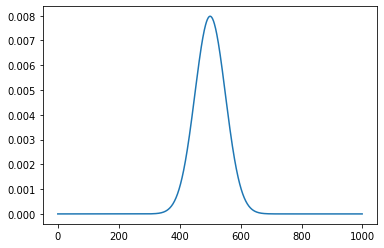

In [4]:
x = list(range(0, 1000))
y = [gaussian(i, 500, 50) for i in x]

plt.plot(x, y)
plt.show()

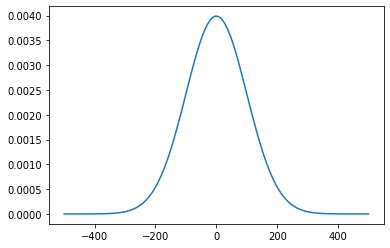

In [5]:
x = np.linspace(-500, 500, 120)
y = [gaussian(i, 0, 100) for i in x]

plt.plot(x, y)
plt.show()

In [6]:
for i in state_transition:
    print(i)
    # for j in i:
    #     print(j)

print(state_transition[1][1])
print(state_transition.shape)

[0.   0.44 0.56 0.  ]
[0.   0.92 0.06 0.02]
[0.   0.04 0.93 0.03]
[0. 0. 0. 0.]
0.92
(4, 4)


In [7]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)
print(a[:, 1] / 5)
a[:, 2] / 2
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[0.4 1.  1.6]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[1, 2], [3, 4]])

print(array1 * array2)
print(array1[:, 1] * array2[:, 1])

[[ 1  4]
 [ 9 16]]
[ 4 16]


In [9]:
model = MarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)

model.get_other_state_number(2)

1

# Forward Probability Surface

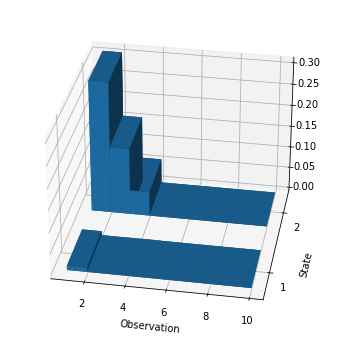

In [10]:
model = MarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)
model.populate_forward()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1, projection="3d")

y_width = 0.6

X = np.arange(1, 10)
Y = np.arange(1, 3) - 0.5*y_width
X, Y = np.meshgrid(X, Y)
Z = np.zeros(model.forward.size)

dx = np.ones(model.forward.size)
dy = y_width * np.ones(model.forward.size)

# ax.plot_surface(X, Y, model.forward, cmap=cm.coolwarm)
ax.bar3d(X.flatten(), Y.flatten(), Z, dx, dy, model.forward.flatten(), shade=True)

ax.set_yticks([1, 2])

ax.set_xlabel("Observation")
ax.set_ylabel("State")
ax.view_init(30, -80)
# plt.zlabel("Forward Likelihood")
fig.show()

In [11]:
from numpy import log as ln

ln(0.5)

-0.6931471805599453

In [12]:
model = LogMarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)

print(model.state_transitions)
model.log_state_transitions()
print(model.state_transitions)

[[0.   0.44 0.56 0.  ]
 [0.   0.92 0.06 0.02]
 [0.   0.04 0.93 0.03]
 [0.   0.   0.   0.  ]]
[[       -inf -0.82098055 -0.5798185         -inf]
 [       -inf -0.08338161 -2.81341072 -3.91202301]
 [       -inf -3.21887582 -0.07257069 -3.5065579 ]
 [       -inf        -inf        -inf        -inf]]


In [13]:
model = MarkovModel(states=[state1, state2], observations=observations, state_transitions=state_transition)
model.populate()

model.baum_welch_state_transitions()

array([[48.59040575,  1.01024542],
       [11.76531328,  2.09407832]])